### Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss

**Multi-Class Classification**

Each sample can belong to one of `C classes`. The CNN will have `C output neurons` that can be gathered in a vector `s` (`Scores`). The target (`ground truth`) vector `t` will be a one-hot vector with a positive class and `C-1 negative classes`. This task is treated as a single classification problem of samples in one of C classes.

**Multi-Label Classification**

Each sample can belong to more than one class. The CNN will have as well `C output neurons`. The target vector `t` can have more than a `positive class`, so it will be a `vector` of `0s` and `1s` with `C dimensionality`. This task is treated as C different binary `(C'=2,t'=0 or t'=1)` and independent classification problems, here `each output` neuron `decides` if a sample belongs to a `class or not`.

<img src="https://gombru.github.io/assets/cross_entropy_loss/multiclass_multilabel.png" alt="ResNet" width="600"/>

### Cross-Entropy Loss

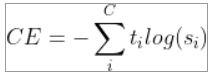

where `ti` and `si` are the `groundtruth` and the `CNN score` for each class i in C. As usually an acitvation function (Sigmoid/Softmax) is applied to the scores before the CE loss consumption.

For Binary Classification Problem (C' = 2)

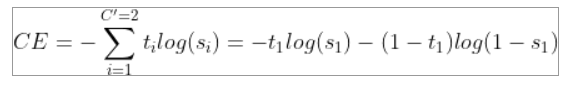

Where it's assumed that there are two classes: `C1` and `C2`. t1 [0,1] and s1 are the groundtruth and the `score` for C1, and `t2=1-t1` and `s2=1-s1` are the `groundtruth` and the score for C2.

Note: Logistic Loss and Multinomial Logistic Loss are other names for Cross-Entropy loss.

### Categorical Cross-Entropy Loss (Sofmax Loss)

<img src="https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png" alt="ResNet" width="600"/>


Cross-Entropy Loss with the Sofmax activation. It is used for `multi-class classification`. In the specific (and usual) case of Multi-Class classification the labels are `one-hot`, so only the `positive class Cp` keeps its term in the loss. There is only one element of the `Target vector t` which is not zero `ti=tp`.

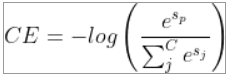

Where `sp` is the CNN score for the `positive class`.

The loss terms coming from the `negative classes` are `zero`. However, the loss gradient respect those negative classes is not cancelled, since the Softmax of the positive class also depends on the negative classes scores.

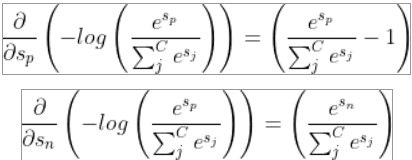

where `sn` is the score of `negative class` in C different from `Cp`.

When Softmax loss is used is a multi-label scenario, loss contains an element for each positive class. Consider M are the positive classes of a sample. The CE Loss with Softmax activations would be:

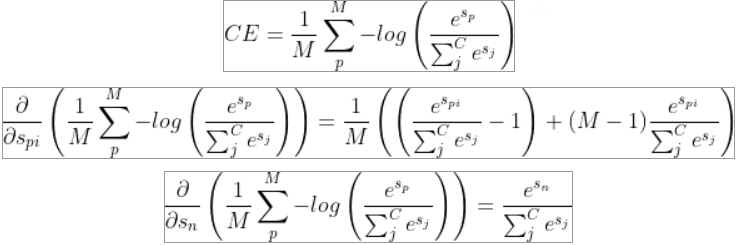

sp in M is the CNN score for each positive class. Scaling factor 1/M to make the loss invariant to the number of positive classes, which may be different per sample.

spi is the score of any positive class.

In [13]:
def categorical_crossentropy(y_true, y_pred):
    '''
    Categorical Cross Entropy

    L(y, p) = - ∑(y_i * log(p_i))

    y is a one-hot encoded vector representing the true class label
    (e.g., [0, 0, 1, 0] for class 2 in a 4-class problem).
    p is the predicted probability distribution over all classes.
    '''
    epsilon = 1e-7
    # Clip predicted values to avoid log(0) errors
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)

    # Compute the categorical cross-entropy loss
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

    return tf.reduce_mean(loss)

In [14]:
import tensorflow as tf

# Usage example:
# Define your one-hot encoded ground truth (y_true) and predicted probabilities (y_pred)
y_true = tf.constant([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=tf.float32)
y_pred = tf.constant([[0.2, 0.3, 0.5], [0.8, 0.1, 0.1], [0.3, 0.6, 0.1]], dtype=tf.float32)

# Compute the Categorical Cross-Entropy Loss
loss = categorical_crossentropy(y_true, y_pred)
print("Categorical Cross-Entropy Loss:", loss.numpy())

Categorical Cross-Entropy Loss: 0.47570547


### Binary Cross Entropy (Sigmoid Cross Entropy)

 Unlike Softmax loss, it is independent for each vector component (class), meaning that the loss computed for `every CNN output` vector component is not `affected by other component values`. That's why it is used for multi-label classification, where the insight of an element belonging to a certain class should not influence the decision for another class. It is called Binary cross-entropy Loss because it sets up a `binary classification problem` between  `C′ = 2` classes for every class in C.

 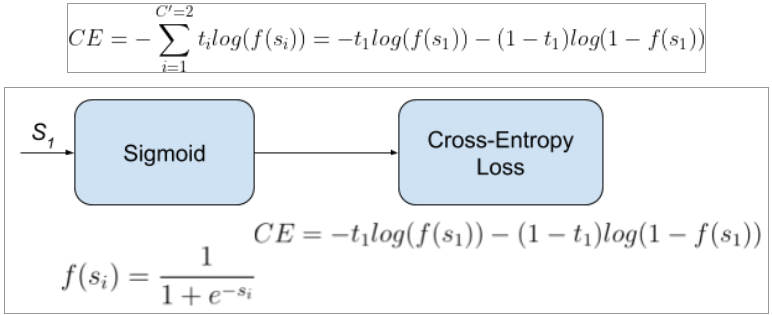

 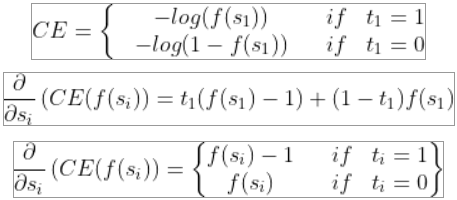

This would be the pipeline for each one of the C clases. We set C independent binary classification problems `(C'=2)`. Then we sum up the loss over the different binary problems: We `sum up the gradients` of every binary problem to `backpropagate`, and the losses to monitor the global loss. `s1` and `t1` are the `score` and the `gorundtruth` label for the `class C1`, which is also the class Ci in C. `s2=1−s1` and `t2=1−t1` are the score and the groundtruth label of the class
`C2`, which is `not a “class”` in our `original problem` with C classes, but a class we create to set up the binary problem with `C1=Ci`. We can understand it as a background class.

* t1=1 means that the class C1=Ci is positive for this sample.

In this case, the activation function does not depend in scores of other classes in C more than C1=Ci. So the gradient respect to the each score si in s will only depend on the loss given by its binary problem.

In [12]:
def binary_crossentropy(y_true, y_pred):
    '''
    Binary Cross Entropy

    L(y, p) = - (y * log(p) + (1 - y) * log(1 - p))

    y is the true label (0 or 1).
    p is the predicted probability of belonging to the
    positive class (typically between 0 and 1).
    '''
    epsilon = 1e-7
    # Clip predicted values to avoid log(0) errors
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)

    # Compute the binary cross-entropy loss
    loss = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

    return tf.reduce_mean(loss)

In [11]:
import tensorflow as tf

# Usage example:
# Define your ground truth (y_true) and predicted probabilities (y_pred)
y_true = tf.constant([0, 1, 1, 0], dtype=tf.float32)
y_pred = tf.constant([0.2, 0.8, 0.9, 0.1], dtype=tf.float32)

# Compute the Binary Cross-Entropy Loss
loss = binary_crossentropy(y_true, y_pred)
print("Binary Cross-Entropy Loss:", loss.numpy())

Binary Cross-Entropy Loss: 0.16425204


### Focal Loss

([Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002))

The main purpose of the focal loss is to improve one-stage object detectors using a novel loss to train RetinaNet detector.

Focal loss is a `Cross-Entropy` Loss that weighs the contribution of `each sample` to the loss based in the `classification error`.

* The idea is that, if a sample is `already classified correctly` by the CNN, `its contribution` to the `loss decreases`. With this strategy, they claim to solve the problem of `class imbalance` by making the `loss implicitly focus` in those problematic classes.

Moreover, with this loss, the `contribution` of each class was `weighted` to the loss in a more explicit class balancing. Sigmoid activations were used, so Focal loss could also be considered a `Binary Cross-Entropy` Loss.

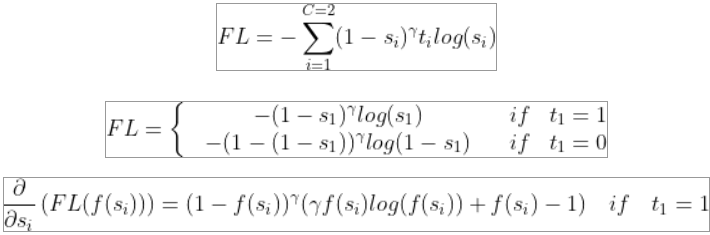

Where `(1-si)γ`, with the focusing parameter `γ>=0`, is a modulating factor to reduce the influence of correctly classified samples in the loss. With `γ=0`, Focal Loss is equivalent to Binary Cross Entropy Loss.

Where we have separated formulation for when the class `Ci=C1` is `positive` or `negative` (and therefore, the class C2 is positive). As before, we have `s2=1-s1` and `t2=1-t1`.

The gradient gets a bit more complex due to the inclusion of the `modulating factor (1-si)γ` in the loss formulation, but it can be deduced using the Binary ross-Entropy gradient expression.In case `Ci` is `positive (ti=1)`, the gradient expression is the expression shown in the third image.

Where `f()` is the `sigmoid function`. To get the gradient expression for a `negative Ci(ti=0)`, we just need to `replace f(si) with (1-f(si))` in the expression above.

Notice that, if the `modulating factor γ=0`, the loss is `equivalent` to the `CE Loss`, and we end up with the same gradient expression.

In [8]:
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalFocalCrossentropy

tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=0.25,
    gamma=2.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    #reduction=losses_utils.ReductionV2.AUTO,
    name='categorical_focal_crossentropy'
)

tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False,
    alpha=0.25,
    gamma=2.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    #reduction=losses_utils.ReductionV2.AUTO,
    name='binary_focal_crossentropy'
)

In [4]:
def focal_loss(y_true, y_pred, alpha=1.0, gamma=2.0):
    '''
    Focal Loss
    FL(p_t) = - (1 - p_t)^gamma * log(p_t)

    p_t is the predicted probability for the true class.
    gamma is a hyperparameter to control the focusing effect.

    The p_t calculation is a way to weigh the predicted probability
    based on the true class label.
    '''
    epsilon = 1e-7
    y_pred = tf.cast(y_pred, tf.float32)
    # Clip predicted values to avoid log(0) errors
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)

    p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
    focal_loss = -tf.pow(1 - p_t, gamma) * tf.math.log(p_t)

    return tf.reduce_mean(alpha * focal_loss)

In [5]:
import tensorflow as tf

# Usage example:
# Define your ground truth (y_true) and predicted probabilities (y_pred)
y_true = tf.constant([0, 1, 1, 0], dtype=tf.float32)
y_pred = tf.constant([0.2, 0.8, 0.9, 0.1], dtype=tf.float32)

# Compute the Focal Loss
loss = focal_loss(y_true, y_pred)
print("Focal Loss:", loss.numpy())

Focal Loss: 0.004989673


### Reference

https://gombru.github.io/2018/05/23/cross_entropy_loss/